# TASKS:-
Predicts the jobs in which the German credit seekers were indulged in and hence, were most unsatisfied with the salaries that they were getting at that time using the input features like- `Credit Amount`, `Age`, `Housing` and `Duration of loan`.

It can also help in predicting the jobs in Germany that will be least preferred by Germans due to lack of satisfaction they may get in the form of their salaries.

# Import Library

In [1]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\IR-P1\German-Credit-Dataset-master\german_credit_data.csv',index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,3,NaN,little,1169,6,radio/TV
1,22,female,2,3,little,moderate,5951,48,radio/TV
2,49,male,1,3,little,NaN,2096,12,education
3,45,male,2,2,little,little,7882,42,furniture/equipment
4,53,male,2,2,little,little,4870,24,car


In [4]:
#print random 5 row
df.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
76,34,male,2,3,little,little,3965,42,radio/TV
494,39,male,1,1,little,little,2122,12,car
964,22,male,1,3,little,moderate,454,6,repairs
788,50,male,2,2,little,moderate,6224,48,education
23,44,male,2,3,moderate,moderate,1804,12,car


In [5]:
#full information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   int64 
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 78.1+ KB


In [6]:
#statistics information
df.describe()

,Age,Job,Housing,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,2.534000,3271.258000,20.903000
std,11.375469,0.653614,0.779392,2822.736876,12.058814
min,19.000000,0.000000,1.000000,250.000000,4.000000
25%,27.000000,2.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,3.000000,2319.500000,18.000000
75%,42.000000,2.000000,3.000000,3972.250000,24.000000
max,75.000000,3.000000,3.000000,18424.000000,72.000000


In [7]:
#shape of dataset
df.shape

(1000, 9)

In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 5


In [9]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))

Discrete feature Count 2


In [10]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [11]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))

Categorical feature Count 4


In [12]:
#check missing value
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [13]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [14]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [15]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

# EDA

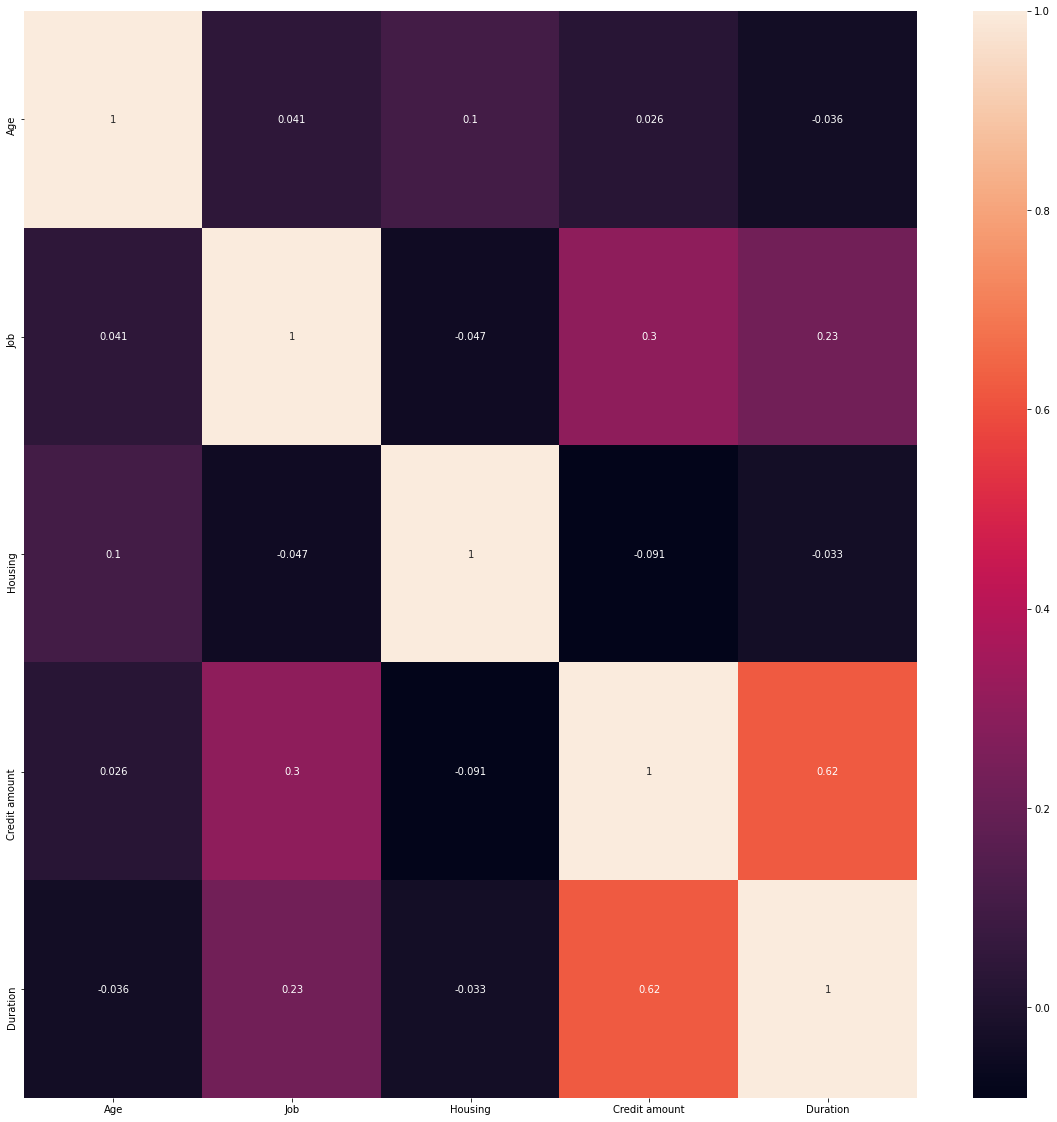

In [16]:
#heatmap
teju = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(teju,annot=True)

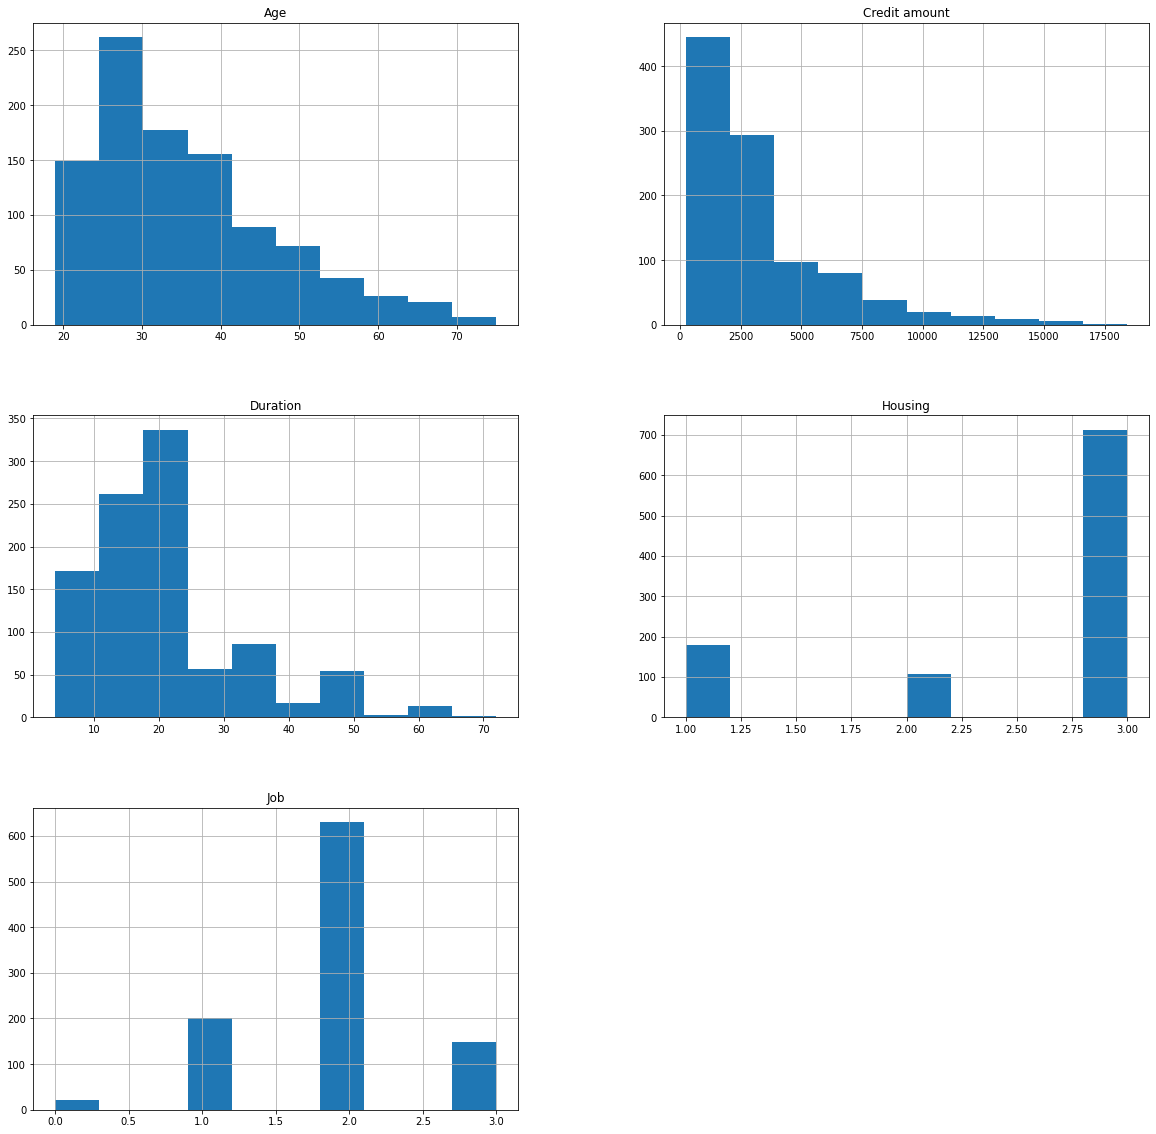

In [17]:
#histogram plot
c = df.hist(figsize = (20,20))

<AxesSubplot:xlabel='Sex', ylabel='count'>

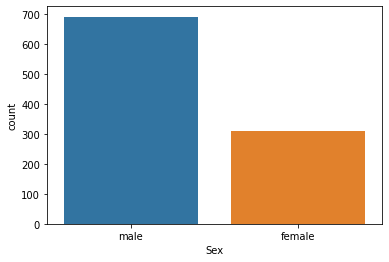

In [18]:
#countplot
sns.countplot(x= 'Sex', data = df)

<AxesSubplot:xlabel='Job', ylabel='count'>

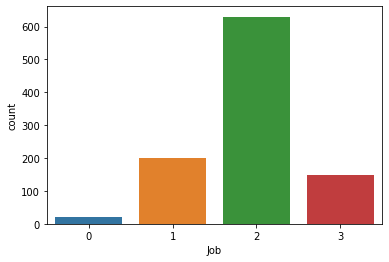

In [19]:
sns.countplot(x= 'Job', data = df)

<AxesSubplot:xlabel='Housing', ylabel='count'>

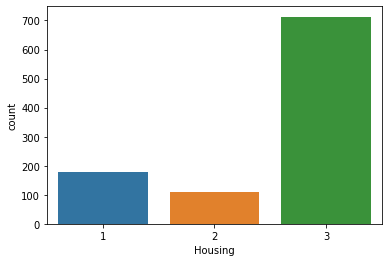

In [20]:
sns.countplot(x= 'Housing', data = df)

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

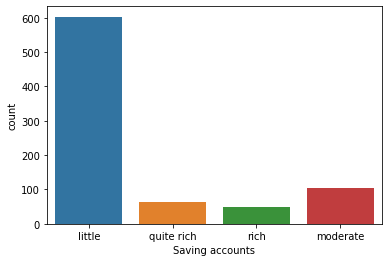

In [21]:
sns.countplot(x= 'Saving accounts', data = df)

In [22]:
df['Saving accounts'] = df['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].dropna().mean())

df['Checking account'] = df['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].dropna().mean())

df['Sex'] = df['Sex'].map({"male":0,"female":1}).astype(float);

df['Purpose'] = df['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(float);

df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,0.0,2,3,0.456548,0.000000,1169,6,0.0
1,22,1.0,2,3,0.000000,1.000000,5951,48,0.0
2,49,0.0,1,3,0.000000,0.651815,2096,12,1.0
3,45,0.0,2,2,0.000000,0.000000,7882,42,2.0
4,53,0.0,2,2,0.000000,0.000000,4870,24,3.0
5,35,0.0,1,2,0.456548,0.651815,9055,36,1.0
6,53,0.0,2,3,2.000000,0.651815,2835,24,2.0
7,35,0.0,3,1,0.000000,1.000000,6948,36,3.0
8,61,0.0,1,3,3.000000,0.651815,3059,12,0.0
9,28,0.0,3,3,0.000000,1.000000,5234,30,3.0


# SCATTER PLOT

<Figure size 432x288 with 0 Axes>

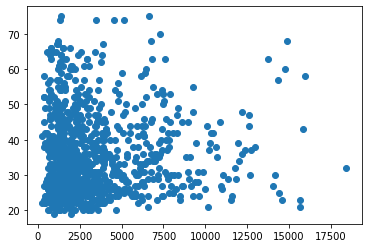

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(df['Credit amount'],df["Age"])
plt.figure()

<Figure size 432x288 with 0 Axes>

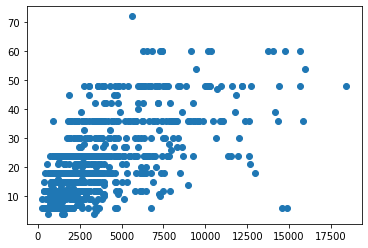

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(df['Credit amount'],df["Duration"])
plt.figure()

# Boxplot

<AxesSubplot:>

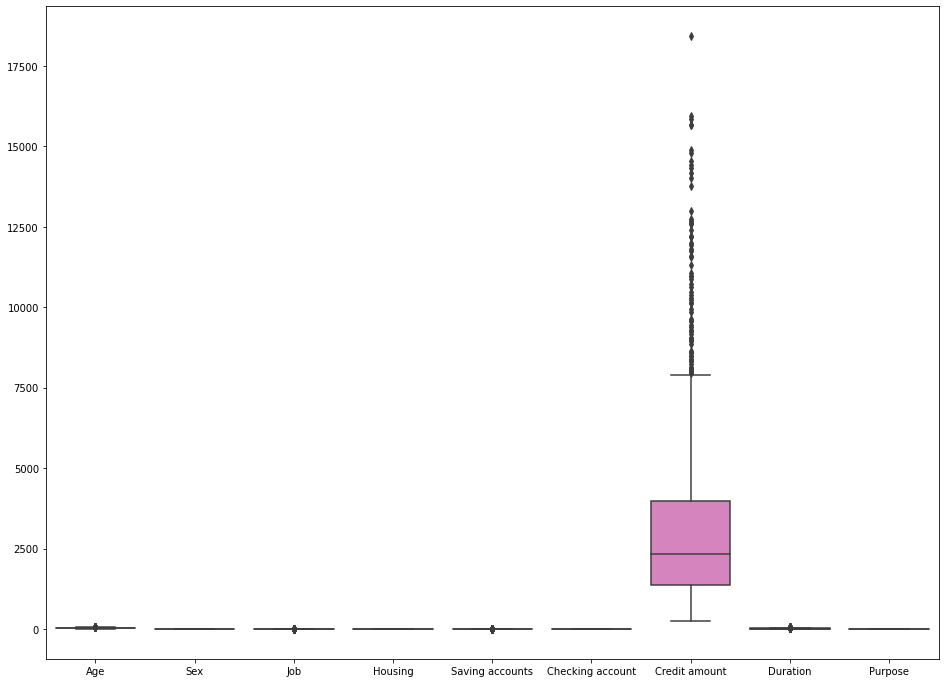

In [25]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

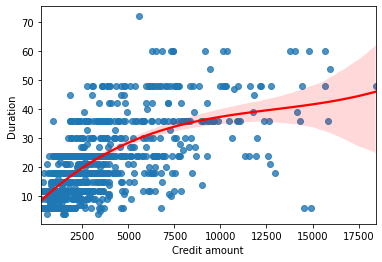

In [26]:
sns.regplot(x=df["Credit amount"], y=df["Duration"],order=3, line_kws={"color":"red"})

<AxesSubplot:>

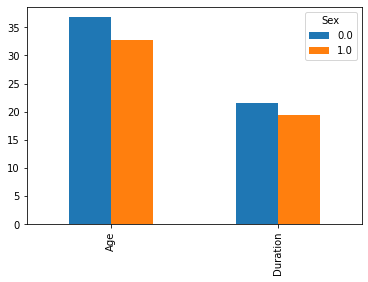

In [27]:
df.groupby("Sex").mean()[["Age", "Duration"]].T.plot(kind="bar")

<AxesSubplot:>

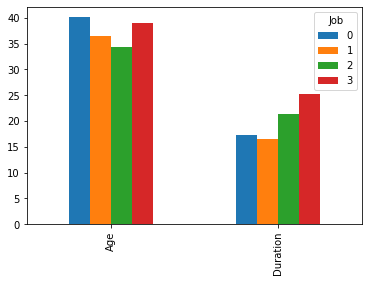

In [28]:
df.groupby("Job").mean()[["Age", "Duration"]].T.plot(kind="bar")

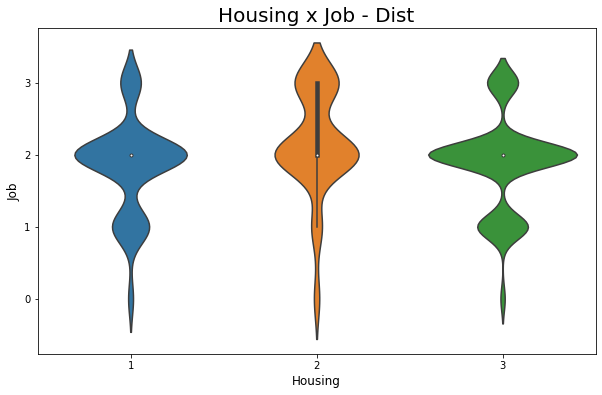

In [31]:
#voilinplot
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df,
                   as_cmap=True, split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

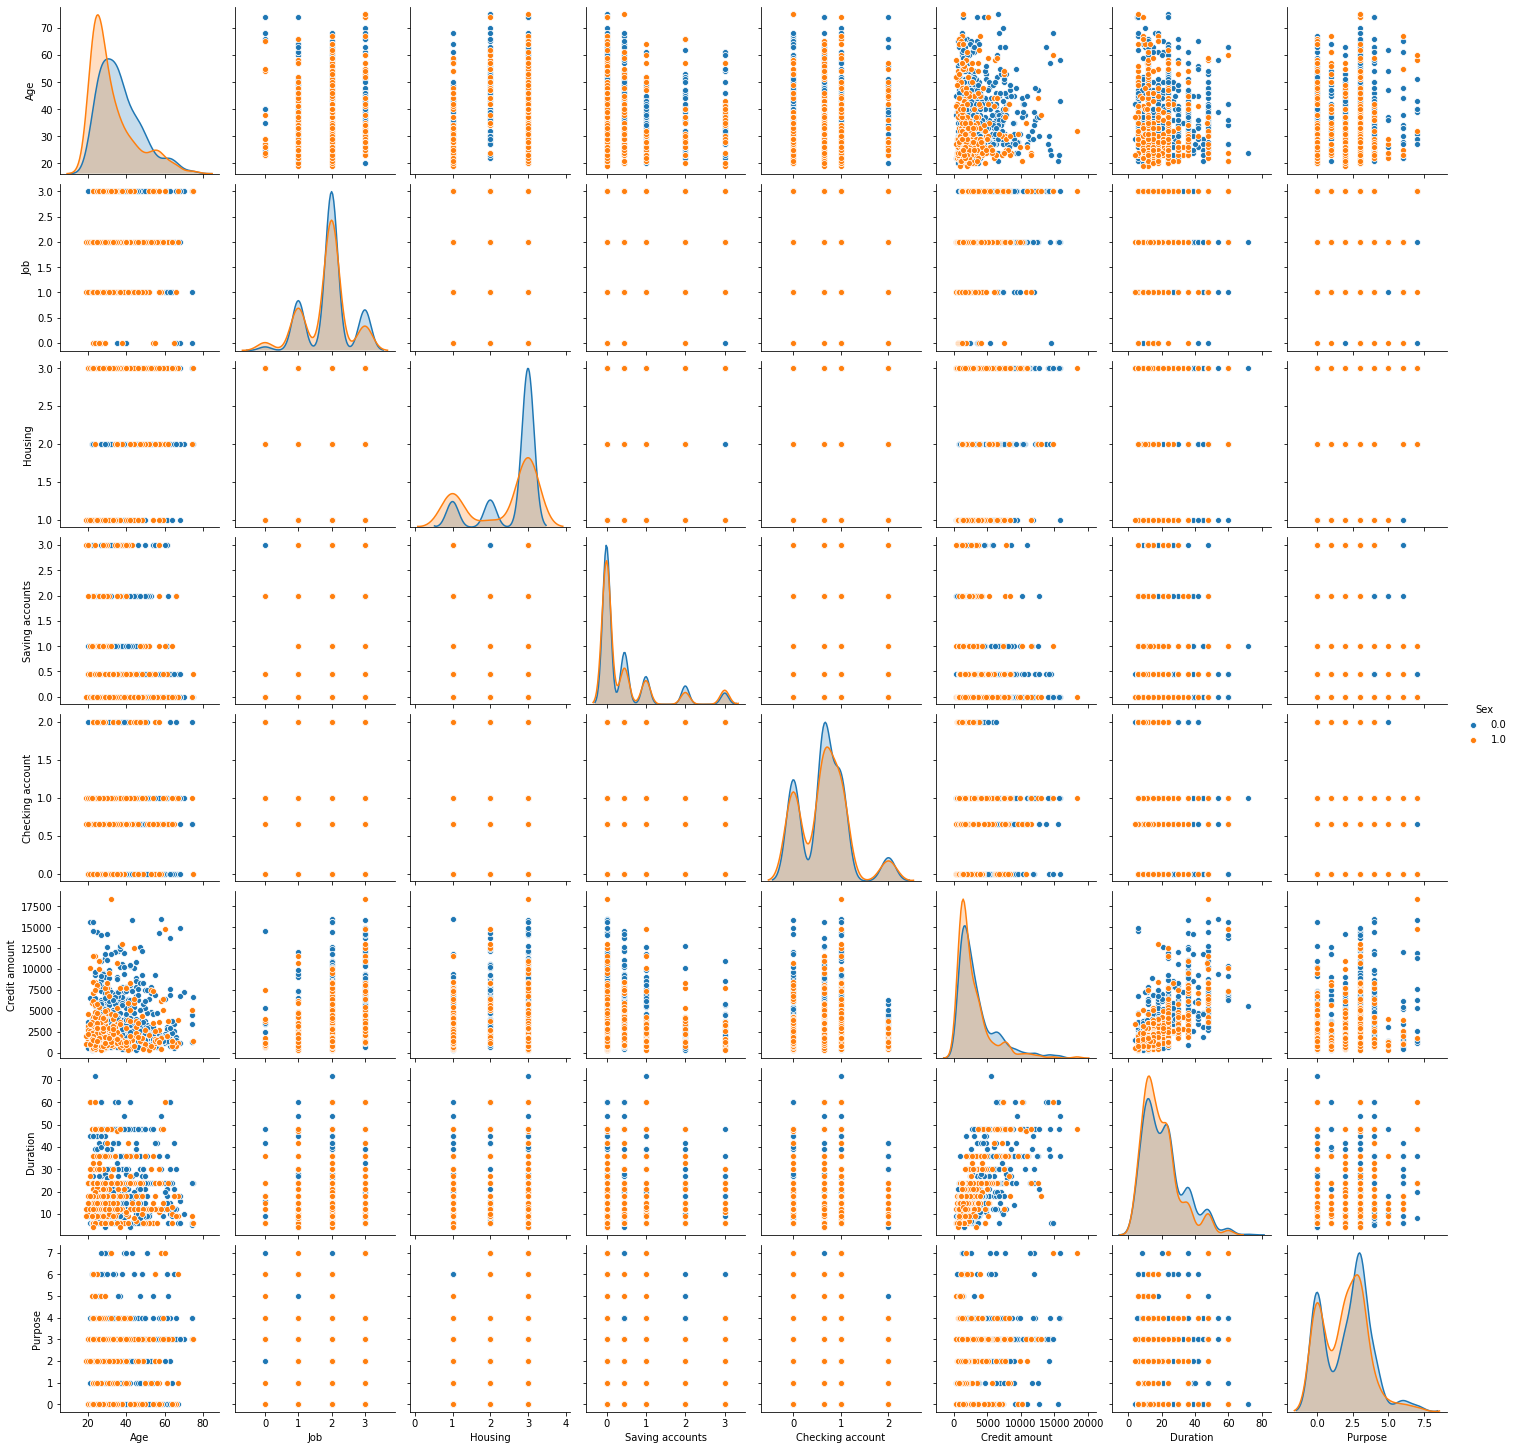

In [39]:
#pairplot
sns.pairplot(data =df, hue = 'Sex')
plt.show()

<AxesSubplot:xlabel='Job', ylabel='Age'>

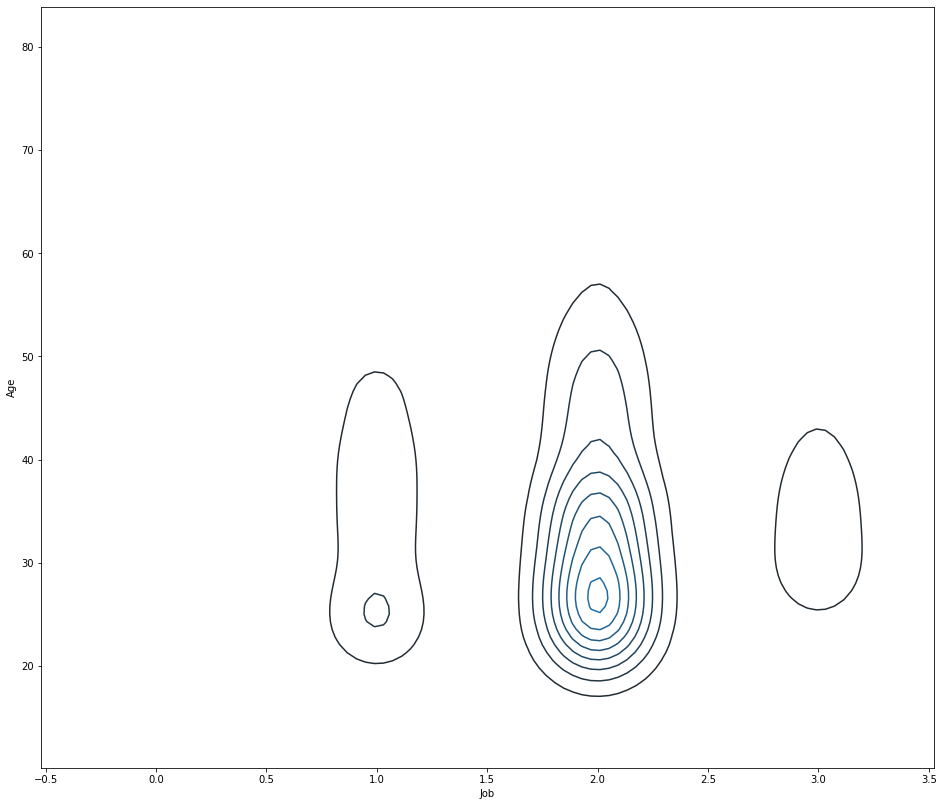

In [43]:
#density plot
plt.figure(figsize=(16,14))
sns.kdeplot(df.Job, df.Age)

In [44]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [45]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,0.0,2,3,0.456548,0.000000,1169,6
1,22,1.0,2,3,0.000000,1.000000,5951,48
2,49,0.0,1,3,0.000000,0.651815,2096,12
3,45,0.0,2,2,0.000000,0.000000,7882,42
4,53,0.0,2,2,0.000000,0.000000,4870,24


In [46]:
y.head()

0    0.0
1    0.0
2    1.0
3    2.0
4    3.0
Name: Purpose, dtype: float64

In [47]:
#Splitting the dataset into training and testing phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [49]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [50]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [51]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [53]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()


    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [54]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.3525
Test score : 0.385
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.49625
Test score : 0.395
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.265
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.385


In [59]:
#building the random forest classifier 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

In [60]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [61]:
#predictive  values for test set 
y_pred = classifier.predict(X_test)
y_pred

array([2., 3., 0., 3., 3., 3., 1., 0., 3., 0., 3., 2., 3., 2., 0., 0., 2.,
       3., 2., 3., 2., 0., 4., 0., 3., 1., 4., 0., 3., 0., 3., 0., 6., 0.,
       0., 3., 0., 4., 3., 3., 0., 2., 3., 0., 0., 0., 2., 2., 0., 3., 3.,
       4., 3., 3., 3., 0., 3., 3., 3., 3., 0., 6., 3., 0., 3., 0., 3., 2.,
       0., 0., 3., 0., 3., 3., 3., 3., 0., 3., 0., 0., 3., 3., 2., 3., 0.,
       3., 3., 3., 0., 3., 0., 3., 0., 0., 0., 2., 4., 3., 3., 3., 4., 0.,
       3., 3., 0., 3., 0., 0., 2., 0., 3., 3., 3., 0., 0., 0., 3., 3., 2.,
       0., 0., 3., 0., 2., 0., 3., 2., 0., 3., 4., 2., 3., 3., 3., 0., 3.,
       0., 1., 3., 3., 0., 3., 0., 2., 3., 0., 4., 3., 3., 2., 3., 4., 0.,
       3., 0., 3., 3., 0., 3., 3., 0., 0., 0., 0., 3., 3., 4., 0., 0., 3.,
       3., 2., 0., 2., 3., 4., 3., 3., 0., 0., 2., 0., 0., 2., 3., 2., 3.,
       1., 3., 0., 0., 3., 0., 3., 3., 0., 0., 3., 3., 3.])

In [64]:
#accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[24  2  6 22  2  0  1  0]
 [ 1  1  0  6  0  0  0  0]
 [20  0  9 13  1  0  1  0]
 [17  0  9 41  4  0  0  0]
 [ 7  0  0  4  3  0  0  0]
 [ 1  1  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.34      0.42      0.38        57
         1.0       0.25      0.12      0.17         8
         2.0       0.38      0.20      0.26        44
         3.0       0.47      0.58      0.52        71
         4.0       0.27      0.21      0.24        14
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         1

    accuracy                           0.39       200
   macro avg       0.21      0.19      0.20       200
weighted avg       0.37      0.39      0.37       200

0.39


# THANK YOU